In [0]:
%matplotlib inline
# TensorFlow and tf.keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import matplotlib.image as mpimg


In [0]:
!unzip sleep.zip

In [0]:
base_dir = ''
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [0]:
batch_size = 20
epochs = 10
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                    rotation_range=45,
                    horizontal_flip=True,
                    zoom_range=0.5)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [158]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 338 images belonging to 3 classes.


In [159]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 337 images belonging to 3 classes.


In [0]:
model = Sequential([
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [193]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= 338 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= 337 // batch_size
)

Epoch 1/10


InvalidArgumentError: ignored

Accuracy:  [0.7264151, 0.7641509, 0.79375, 0.7753165, 0.7893082, 0.753125, 0.7816456, 0.7625, 0.7798742, 0.7861635]


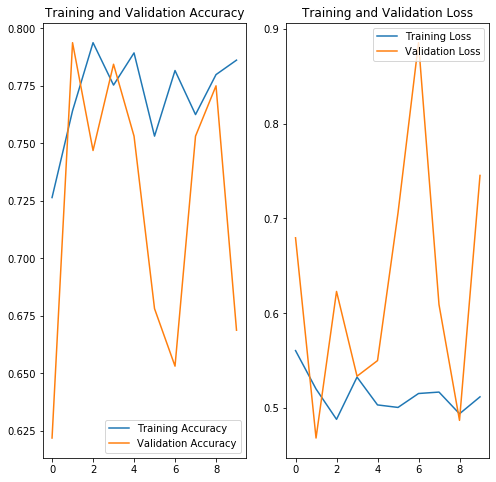

In [191]:
acc = history.history['acc']
val_acc = history.history['val_acc']
print('Accuracy: ', acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()